# Testes de Hipóteses com Dados de Saúde Pública

## Objetivos:
1. Verificar se há relação significativa entre *gasto total em saúde municipal per capita* e *percentual de receita própria municipal aplicada em saúde*.
2. Avaliar se municípios com maior *cobertura de atenção básica* possuem maior *gasto total em saúde per capita*.


In [19]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr

sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 9)

## Carregar o Dataset

In [20]:
# Carregar o dataset
dataset_path = '../datasets/uf_limpo.csv'
saude = pd.read_csv(dataset_path)

# Exibir informações iniciais
print(saude.head())
print(saude.info())

    ano sigla_uf     cob_ab    cob_acs    cob_esf  cob_vac_bcg  cob_vac_rota  \
0  2010       AC  75.558215  87.753425  64.064896        100.0     66.749718   
1  2010       AL  78.580644  77.051768  72.961540        100.0     74.794916   
2  2010       AM  65.216161  69.136690  50.478242        100.0     58.681194   
3  2010       AP  90.042754  89.235233  73.277913        100.0     73.531058   
4  2010       BA  66.063220  82.518806  59.840187        100.0     72.142332   

   cob_vac_menin  cob_vac_pneumo  cob_vac_polio  ...  desp_recp_saude_pc_mun  \
0       0.652842        4.864448     100.000000  ...              114.166340   
1       3.434813        6.652844     100.000000  ...              124.854673   
2       2.051782        7.585714      92.480398  ...              163.538580   
3       0.395436        4.546726      90.752658  ...              111.239863   
4      64.723803        2.831480      95.929891  ...              120.605392   

   pct_desp_recp_saude_uf  desp_tot_sa

## Teste 1: Relação entre *Gasto Total per Capita* e *Percentual de Receita Própria Municipal*

**Hipótese Nula (H₀):** Não há correlação significativa entre os gastos e o percentual de receita própria.

**Hipótese Alternativa (H₁):** Há correlação significativa entre os gastos e o percentual de receita própria.

Correlação de Pearson: 0.69
Valor-p: 0.00000


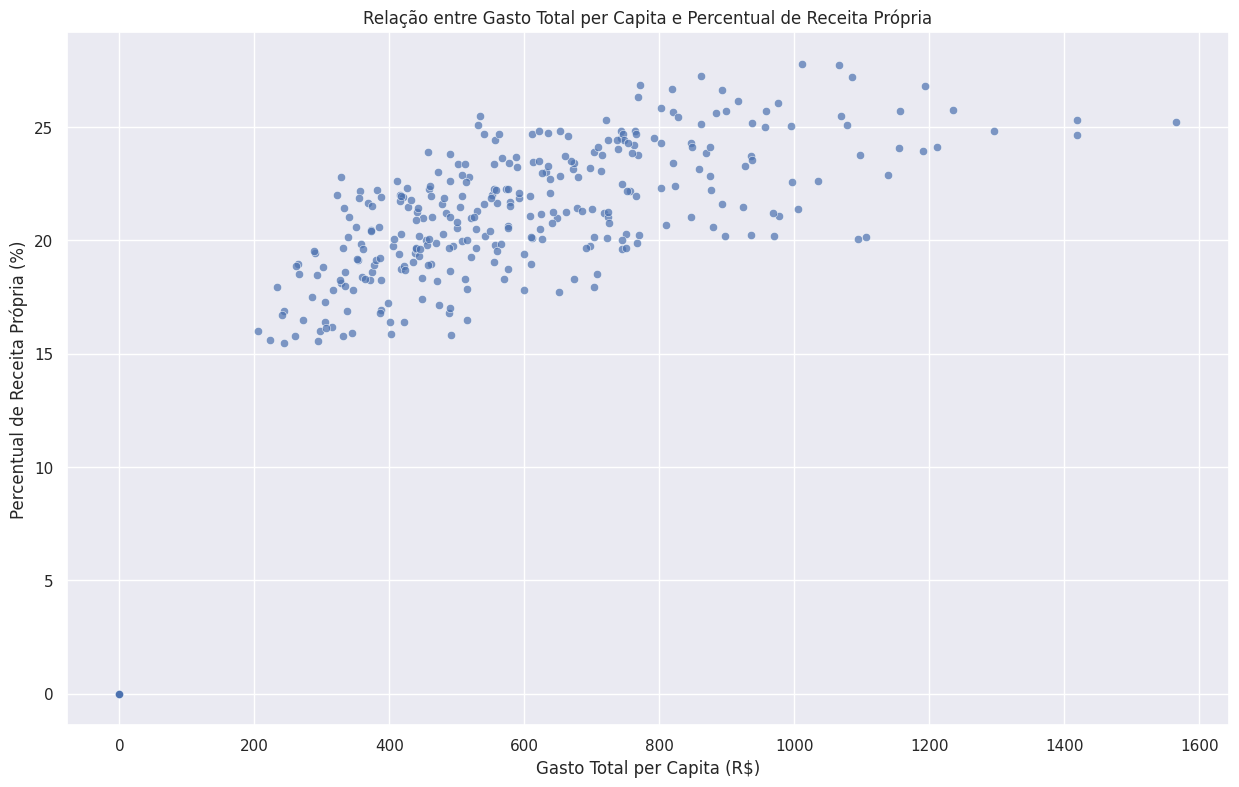

In [21]:
# Filtrar as colunas relevantes
dados_teste1 = saude[['desp_tot_saude_pc_mun', 'pct_desp_recp_saude_mun']].dropna()

# Calcular a correlação de Pearson
corr, p_value = pearsonr(dados_teste1['desp_tot_saude_pc_mun'], dados_teste1['pct_desp_recp_saude_mun'])

# Exibir os resultados
print(f"Correlação de Pearson: {corr:.2f}")
print(f"Valor-p: {p_value:.5f}")

# Visualização
sns.scatterplot(x='desp_tot_saude_pc_mun', y='pct_desp_recp_saude_mun', data=dados_teste1, alpha=0.7)
plt.title('Relação entre Gasto Total per Capita e Percentual de Receita Própria')
plt.xlabel('Gasto Total per Capita (R$)')
plt.ylabel('Percentual de Receita Própria (%)')
plt.grid(True)
plt.show()

## Teste 2: Comparação entre Municípios com Maior e Menor Cobertura de Atenção Básica

**Hipótese Nula (H₀):** Municípios com maior cobertura de atenção básica não possuem gastos significativamente diferentes.

**Hipótese Alternativa (H₁):** Municípios com maior cobertura de atenção básica possuem gastos significativamente diferentes.

Estatística t: 2.74
Valor-p: 0.00658


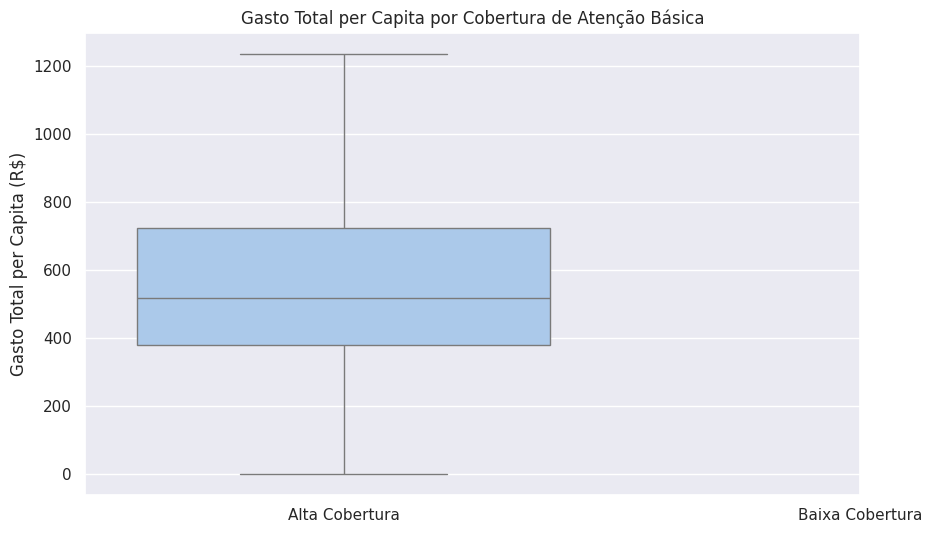

In [22]:
# Definir limiar para alta e baixa cobertura de atenção básica
limiar_cobertura = saude['cob_ab'].median()

# Dividir os dados em dois grupos
grupo_alto = saude[saude['cob_ab'] >= limiar_cobertura]['desp_tot_saude_pc_mun'].dropna()
grupo_baixo = saude[saude['cob_ab'] < limiar_cobertura]['desp_tot_saude_pc_mun'].dropna()

# Teste t independente
t_stat, p_value = ttest_ind(grupo_alto, grupo_baixo)

# Exibir resultados
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.5f}")

# Visualização
plt.figure(figsize=(10, 6))
sns.boxplot(data=[grupo_alto, grupo_baixo], palette='pastel')
plt.xticks([0, 1], ['Alta Cobertura', 'Baixa Cobertura'])
plt.title('Gasto Total per Capita por Cobertura de Atenção Básica')
plt.ylabel('Gasto Total per Capita (R$)')
plt.show()